We are given some hints regarding the locations of a person. The following point of interest hints aim at locating the most probable GPS coordinates and the distribution over the areas where he may be easier found.

Populating the interactive namespace from numpy and matplotlib
20 datapoints 0.0 7.550371152
20 datapoints -2730.0 -2722.44962885
20 datapoints 2730.0 2737.55037115
          x         y  distance
0  7.256812  0.000000  7.256812
1  7.550371  1.237189  7.651061
2  6.468423  1.657769  6.677477
3  6.296206  2.933414  6.946016
4  6.775786  3.278303  7.527187 
 Shortest distance to the river:  6.67747658059
Plotting Gaussian for x in range  0.0 7.550371152


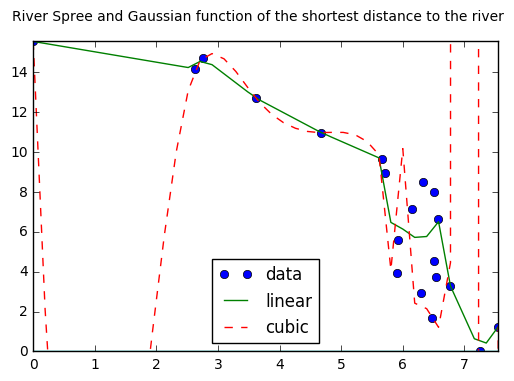

,x,y,distance
0,7.256812,0.000000,7.256812
1,7.550371,1.237189,7.651061
2,6.468423,1.657769,6.677477
3,6.296206,2.933414,6.946016
4,6.775786,3.278303,7.527187
5,6.543232,3.723639,7.528570
6,5.905129,3.932200,7.094557
7,6.512729,4.520103,7.927609
8,5.925501,5.600007,8.153014
9,6.573846,6.650813,9.351405


In [31]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import math
from matplotlib.colors import LogNorm  # numpy.random.lognormal(mean=0.0, sigma=1.0, size=None)
from numpy.random import randn
from scipy.stats import lognorm
import pylab as pl
%pylab inline
    
def shortest_distance_to_river(x,y, riverDF):
    # returns shortest distance to the river
    # river contains the coordinates (x,y) of the river
    riverDF['distance'] = np.sqrt((riverDF['x']-x)**2 + (riverDF['y']-y)**2)
    min_dist = riverDF['distance'].min()
    #riverDF['distance'] = ((riverDF['x']-x)**2 + (riverDF['y']-y)**2).apply(np.sqrt)
    print riverDF.head(),'\n', " Shortest distance to the river: ",min_dist
    return min_dist

def cartesian2polar(theta):
    # cartesian coordinates to polar ones.
    # theta goes from 0 to 2pi:     theta = np.linspace(0, 2*np.pi, 100)
    x1 = r*cos(theta)
    x2 = r*sin(theta)
    # if you use these substitions in the circle equation you will see that r=sqrt(0.6).
    return x1, x2

def GPS2XYcoords(SW_lat, SW_lon, P_lat, P_lon):
    # The x and y coordinates of a GPS coordinate P with (P_lat, P_lon) can be calculated using: 
    Px = (P_lon - SW_lon) * np.cos(SW_lat * np.pi / 180) *111.323 
    Py = (P_lat - SW_lat) * 111.323
    #print "X,Y coords: ", Px, Py
    return Px, Py

def latitude2XCoord(P_lat):
    # South-west corner of the area we are interested in:  
    SW_lat = 52.464011 # (Latitude) 
    return (P_lat - SW_lat) * 111.323
    
def longitude2YCoord(P_lon):
    # South-west corner of the area we are interested in: 
    SW_lat = 52.464011 # (Latitude) 
    SW_lon = 13.274099 #(Longitude)
    return (P_lon - SW_lon) * np.cos(SW_lat * np.pi / 180) *111.323 

def GPS2XYcoordsDF(SW_lat, SW_lon, P_lat, P_lon):
    Px, Py = GPS2XYcoords(SW_lat, SW_lon, P_lat, P_lon)
    return pd.DataFrame({'x':[Px], 'y':[Py]})

def interpolate1D(x, y, title):
    from scipy.interpolate import interp1d
    fig = plt.figure()
    fig.suptitle(title)
    f = interp1d(x, y)
    #f2 = interp1d(x, y, kind='cubic')
    xnew = np.linspace(x.min(), x.max(),num=len(x), endpoint=True) 
    plt.plot(x, y, 'o', xnew, f(xnew), '-')#, xnew, f2(xnew), '--')
    plt.legend(['data', 'linear', 'cubic'], loc='best')
    plt.show()
    fig.savefig(title.join('.png'))

def gaussian(x_range_left, x_range_right, mu, sigma):
    """
     A*np.exp(-(x-mu)**2/(2.*sigma**2))
    """
    from scipy.stats import norm
    # http://yaboolog.blogspot.com.es/2011/07/python-tips-draw-gaussian-pdf-graph.html
    # Plot between -10 and 10 with .001 steps.
    print "Plotting Gaussian for x in range ", x_range_left, x_range_right
    #fig = plt.figure()
    x_axis = np.arange(x_range_left, x_range_right, 0.001)
    gaussian = norm.pdf(x_axis, mu, sigma)
    fig = plt.plot(x_axis, gaussian) # pdf(axis_range, mu, sigma)
    # TODO: how to save this plot? fig.savefig('Gaussian-funct-of-candidates-shortest-distance-to-river.png')
    plt.show() 
    return x_axis, gaussian   
    
def gaussian_of_shortest_dist_to_river(x, y, riverGPS_df):
    """
    The candidate is likely to be close to the river Spree. The probability at any point is given
    by a Gaussian function of its shortest distance to the river. The function peaks at zero and
    has 95% of its total integral within +/-2730m.
    "Peaks at zero" -> the Gaussian has as mean = 0?
    "a Gaussian function of its shortest distance to the river"-> the Gaussian has as mean the shortest distance?
    SE = stdev(x)/sqrt(N)
    If the underlying distribution of the coefficients is normal, the 95% confidence interval is 
    [mean-2*sigma,mean+2*sigma], so the standard deviation is 1/4 the width of the interval. See [1]
    """
    d = shortest_distance_to_river(x,y,riverGPS_df)
    sigma = 2730/2
    return gaussian(riverGPS_df.x.min(), riverGPS_df.x.max(), d, sigma) # TODO: d or 0?
             
def draw_River_Spree():
    GPS = pd.read_csv('./data/RiverSpreeGPS.csv', header=None) 
    GPS.columns = ['x','y']
    #print "GPS before\n", GPS.head()
    GPS['x'] = GPS['x'].apply(latitude2XCoord)
    GPS['y'] = GPS['y'].apply(longitude2YCoord)
    interpolate1Ds(GPS['x'], GPS['y'], GPS['x']-2730, GPS['y']-2730, GPS['x']+2730, GPS['y']+2730,"River Spree and Gaussian function of the shortest distance to the river", 'cubic')
    gaussian_of_shortest_dist_to_river(0, 0, GPS)
    #GPS.plot('x', 'y', kind='scatter') 
    return GPS

def draw_log_normal_pdf_around_Brandenburg_gate(SW_lat, SW_lon):
    """
    A probability distribution centered around the Brandenburg Gate also informs us of the
    candidate’s location. The distribution’s radial profile is log-normal with a mean of
    4700m and a mode of 3877m in every direction. 
    Brandenburg Gate GPS coordinates
    52.516288,13.377689

    On a logarithmic scale, mu and sigma can be called the location parameter and the scale parameter, 
    respectively in a LogNorm. The mode is the point of global maximum of the probability density function; 
    It solves the equation (ln f)'=0
    The probability density function of the lognormal distribution with parameters μ and σ, f, increases 
    and then decreases with mode at x = exp(μ−σ^2) 
    REF: http://www.math.uah.edu/stat/special/LogNormal.html
    {Mode}[X]=e^{mu -sigma^{2}}
    TODO: "Centered around the Gate" -> the gate's x coord is its mean?
        # e.g. normal distribution center at x=0 and y=5:
        # x = randn(100000)     #     y = randn(100000)+5
    TODO Alternative: use colormap normalization: http://matplotlib.org/users/colormapnorms.html
    """    
    # the coordinates of the gate are the center of our PDF of the LogNormal
    center_x, center_y = GPS2XYcoords(SW_lat, SW_lon, 52.516288, 13.377689) #7.0259513879, 5.819632471 #GPS2XYcoords(SW_lat, SW_lon, 52.516288, 13.377689)
    mu = 4700 # mean
    mode = 3877   
    #mode = np.exp(mu - sigma^2)  from this expression, we can apply logarithms and obtain stdev as:  
    stddev = mu - np.log(mode)
    print "We obtain stddev from the mean and mode: ", stddev, " and center the gate on (X,Y)= ",center_x, center_y
    dist=lognorm([stddev],loc= center_x)#loc=mu)  # localize around center_x?
    x= np.linspace(5,10, 200)#latitude2XCoord(SW_lat), latitude2XCoord(center_x+8), 200)
    pl.plot(x, dist.pdf(x), '-b', label='LogNorm') # dist.cdf
    pl.legend(loc='upper right')
    #pl.plot(x + center_x, dist.pdf(x + center_x))  # also possible: dist.cdf

    pl.title('LogNorm PDF centered around the Gate (Coord X,Y =%f,  %f)'%(center_x, center_y))
    pl.savefig('LogNorm-centered-around-gate.png')
    print "Radial LogNormal drawn!" 
    #return xedges, yedges

def draw_map():
    """
    Draws all areas of interest in the map
    TODO: 
    1) Use colormap with sentinels: 
    https://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Plotting_Images_with_Special_Values.html 
    2) Plot all features in only one plot: Pylab and Matplotlib do not allow it? / Use only matplotlib?
    3) Use proper map with density estimation http://scikit-learn.org/stable/auto_examples/neighbors/plot_species_kde.html#sphx-glr-auto-examples-neighbors-plot-species-kde-py
    """
    fig = plt.figure()
    
    # Draw Gaussian of the shortest distance to the river
    # draw_River_Spree() 
    
    #ax = fig.gca()
    #ax = fig.add_subplot(1, 1, 1)
    #ax.set_xlim(SW_x, SW_y)     #fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
    # (or if you have an existing figure)
    # fig = plt.gcf()
    # ax = fig.gca()
        
    # TODO: problem plotting: pylab and matplotlib do not plot together?
    # Draw Radial LogNormal around Brandenburg Gate
    # draw_log_normal_pdf_around_Brandenburg_gate(SW_lat, SW_lon)   
    # Draw satellite path
    # satellite_path = draw_Satellite_path()   
    
    print "Full map drawn!"  
    plt.show()
    fig.suptitle("Candidate's probable locations for search\n River Spree and Gaussian function of the shortest distance to the river")  
    fig.savefig('map.png')

def interpolate1Ds(x, y, lower_x, lower_y, upper_x, upper_y, title, interpolation_type):
    from scipy.interpolate import interp1d
    """ 
    For more than 1D grids, see https://docs.scipy.org/doc/scipy-0.18.0/reference/tutorial/interpolate.html
    """
    print len(x), "datapoints", x.min(), x.max()
    print len(lower_x), "datapoints", lower_x.min(), lower_x.max()
    print len(upper_x), "datapoints", upper_x.min(), upper_x.max()    
    fig = plt.figure()
    fig.suptitle(title)
    f = interp1d(x, y) 
    f3 = interp1d(x, y, kind=interpolation_type)
    f_low = interp1d(lower_x, lower_y)#, kind='cubic')
    f_upp = interp1d(upper_x, upper_y)#, kind='cubic')
    #f2 = interp1d(x, y, kind='cubic')
    xnew = np.linspace(x.min(), x.max(), num=len(x)*2, endpoint=True) 
    lower_margin_x = np.linspace(lower_x.min(), lower_x.max(), num=len(lower_x)*2, endpoint=True) 
    upper_margin_x = np.linspace(upper_x.min(), upper_x.max(),num=len(upper_x)*2, endpoint=True)
    plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f3(xnew), '--')
    # TODO: DOES NOT WORK, WHY DOES IT PLOTS ONLY THE FIRST POINT?
    # a) plt.plot(x, y, 'o', xnew, f3(xnew), '-', lower_margin_x, f_low(lower_margin_x), '--', upper_margin_x, f_upp(upper_margin_x), '+')# xnew, f2(xnew), '--')
    # b) plt.plot(lower_x, lower_y, 'o', lower_margin_x, f_low(lower_margin_x), 'r--')
    #    plt.plot(upper_x, upper_y, 'o', upper_margin_x, f_upp(upper_margin_x), 'g+')
    #plt.legend(['data', 'linear', 'lower', 'low_linear', 'upper', 'up_linear'], loc='best')
    plt.legend(['data', 'linear', interpolation_type], loc='best')
    plt.ylim([y.min(), y.max()])
    plt.xlim([x.min(), x.max()])
    title = title +'.png'
    fig.savefig(title)
#     plt.ylim([-3000, 3000])
#     plt.xlim([-3000, 3000])

def draw_Satellite_path():
    """
    A satellite offers further information: with 95% probability she is located within 2400m
    distance of the satellite’s path (assuming a normal probability distribution).
    Satellite path is a great circle path between coordinates:
    52.590117,13.39915
    52.437385,13.553989
    NOTE: In this case we do not need to plot a circle, the satellite is real and its projection on 
    Earth will be the projected line we need to plot.
    """
    fig = plt.figure()
    x, y = GPS2XYcoords(SW_lat, SW_lon, 52.590117,13.39915)
    x1, y1 = GPS2XYcoords(SW_lat, SW_lon, 52.437385,13.553989)
    sat = pd.DataFrame({'x':[x, x1], 'y':[y, y1]})
    print "Satellite path (X,Y): ", sat.head()
    #does not work: interpolate1Ds(sat.x, sat.y, sat.x+2400, sat.y+2400, sat.x-2400, sat.y-2400,"Normal Probab. Distrib. along the Satellite path", 'linear')
    title = 'Satellite path along (X1,Y1)= (' + str(round(x,2)) +','+str(round(y,2))+') and (X2,Y2)= ('+ str(round(x1,2))+','+ str(round(y1,2))+')'
    plot_gaussian3D(sat.x, sat.y, title)
    plt.show()
    fig.savefig('satellite-path.png')

    
def plot_gaussian3D(x, y, title):
    from matplotlib.mlab import bivariate_normal
    from mpl_toolkits.mplot3d import Axes3D
    #Parameters to set
    mu_x = x.mean()
    sigma_x = x.std()
    mu_y = y.mean()
    sigma_y = y.std()

    #Create grid and multivariate normal
    x = np.linspace(x.min(), x.max(),500)
    y = np.linspace(y.min(),y.max(),500)
    X, Y = np.meshgrid(x,y)
    Z = bivariate_normal(X,Y,sigma_x,sigma_y,mu_x,mu_y)

    #Make a 3D plot
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z,cmap='viridis',linewidth=0)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    fig.suptitle(title)
    plt.show()
    title += '.png'
    fig.savefig(title)

# South-west corner of the area we are interested in: 
SW_lat = 52.464011 # (Latitude) 
SW_lon = 13.274099 #(Longitude)

# Draw Gaussian of the shortest distance to the river
draw_River_Spree() 

We obtain stddev from the mean and mode:  4691.73718306  and center the gate on (X,Y)=  7.0259513879 5.819632471
Radial LogNormal drawn!


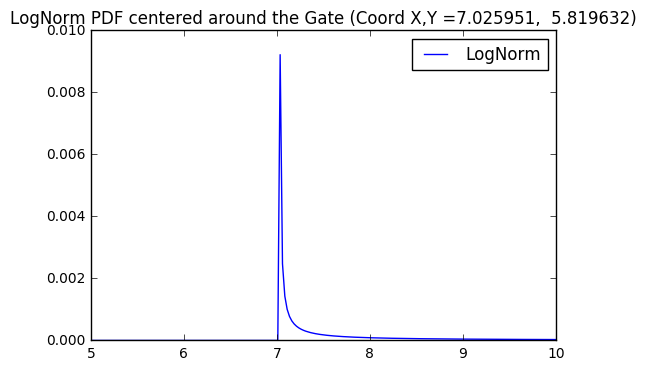

In [26]:
# Draw Radial LogNormal around Brandenburg Gate
draw_log_normal_pdf_around_Brandenburg_gate(SW_lat, SW_lon)

Satellite path (X,Y):             x          y
0   8.481535  14.038498
1  18.983430  -2.964086


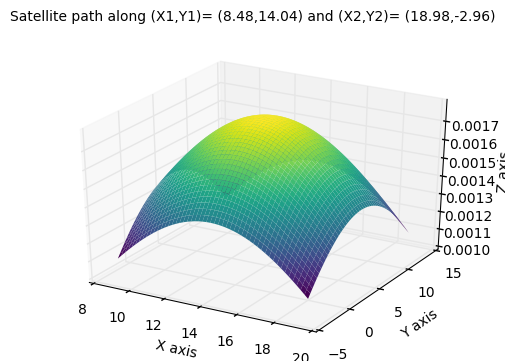

In [27]:
# Draw satellite path
draw_Satellite_path()

# APPENDIX


## REFERENCES

[1] SD = sqrt(N)(upper limit-lower limit)/3.92   

for a 95% CI if the sample size is large (>100.e.g in each group)
    http://handbook.cochrane.org/chapter_7/7_7_3_2_obtaining_standard_deviations_from_standard_errors_and.htm
    TODO: norminv(0.975)*sigma=1.9600*sigma
        

[2] Approximating a circle with Bezier curves: http://www.tinaja.com/glib/ellipse4.pdf

[3] Fitting a circle to a set of points through least squares: http://scipy-cookbook.readthedocs.io/items/Least_Squares_Circle.html


## CODE SNIPPETS

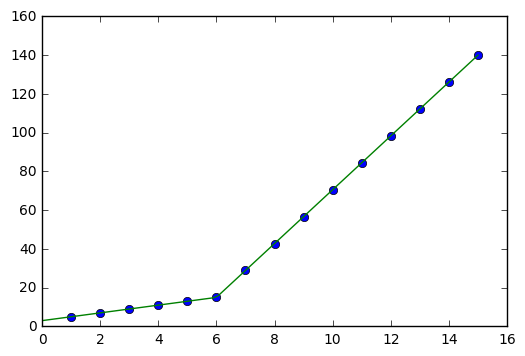

In [28]:
def draw_circle_passing_by(x, y, x1, y1):
    """
    If we were to plot a circle, we could do it with 2 or more points with Least Squares Circle: 
    http://scipy-cookbook.readthedocs.io/items/Least_Squares_Circle.html
    https://gist.github.com/lorenzoriano/6799568
    """
    if x>x1:
        center_x = x1+(x-x1)/2
    else:
        center_x = x+ (x1-x)/2
    if y>y1:
        center_y = y1+(y-y1)/2
    else:
        center_y = y+ (y1-y)/2
    radius = math.sqrt((x - center_x)**2 + (y - center_y)**2)
    print "Satellite cicular path drawn!"
    satellite_path = draw_circle(center_x, center_y, radius, 'r')
    outer = draw_circle(center_x, center_y, radius+2400, 'g')
    inner = draw_circle(center_x, center_y, radius-2400, 'b')
    return outer, satellite_path, inner

def draw_circle(x, y, r, color):
    fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
    # Circle takes (x,y) coordinates of the circle's center, and radius r
    circle = plt.Circle((x,y), r, color=color, fill=False, clip_on=False) #  make a circle with no fill
    # Add that artist to an instance of axes:
    ax.add_artist(circle)
    plt.show()
    print "Circle drawn!"
    return circle






from scipy import optimize
def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

def fit_curve(x, y):
    p , e = optimize.curve_fit(piecewise_linear, x, y)
    xd = np.linspace(0, 15, 100)
    plt.plot(x, y, "o")
    plt.plot(xd, piecewise_linear(xd, *p))
    plt.show()
    
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 13, 14, 15], dtype=float)
y = np.array([5, 7, 9, 11, 13, 15, 28.92, 42.81, 56.7, 70.59, 84.47, 98.36, 112.25, 126.14, 140.03])
fit_curve(x,y)

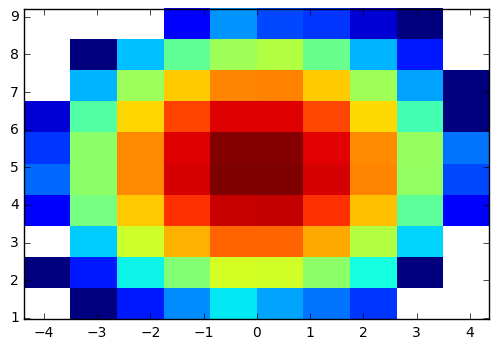

In [29]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from numpy.random import randn

def LogNorm_density():
    #normal distribution center at x=0 and y=5
    x = randn(100000)
    y = randn(100000)+5

    H, xedges, yedges, img = plt.hist2d(x, y, norm=LogNorm())
    fig = plt.figure()
    plt.show()
    
LogNorm_density()